<a href="https://colab.research.google.com/github/tirthachetry/Telco_Churn_Analysis/blob/main/Telco_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # **INTRODUCTION - PREDICTING CHURN RATE**

---






Hello and welcome to this online notebook. You may think of it as an interactive article. 


**I´m sure that you haven´t been able to escape the buzzwords "A.I" and "Machine Learning" flying around everywhere.  A. I will not revolutionize the workplace overnight. It is more likely that just like previous digital tools such as Email and Word Processing Packages, that it will slowly but surely become ubiquitous. Here is a way for non-technical folk to start to understand it and utilize this latest tool practically **


What we have here is an exercise to try and understand how we can use Machine Learning to predict whether or not a customer is about to leave your company (otherwise known as **Churn**). This tutorial is aimed at non-technical people and is meant to be straightforward to follow. I hope to show that these predictive tools are accessible to everyone and anyone who owns a laptop. No prior knowledge of Machine Learning is required. Therefore, these tools can be just as useful to big corporates as to budding entrepreneurs. Everyone should be using these tools to optimize their business development decisions, simple as.

For the purpose of this exercise, we are  going to use a dataset from the telecom giant **Telco** to predict if one of their customers is about to cruelly, cold-heartedly leave them for a competitor.The dataset is comprised of more than 7000 different customer profiles. For each customer, we have a set of different type of information ( in this case **21 columns**) and we will try to use these different sets of information as indicators of whether customer left the company or not.

Imagine this to be historical data taken from the customer database from last quarter or last year's data as typically corporations would  have a dataset like this comprised of a few million these customer profiles (so today's dataset is tiny in comparison but it will serve nicely as a quick illustration).

Once the learning model has figured out the key predictors , we can then use this model on our current customers to find out which one of them is likely to leave us soon. Learning from the past to predict the future. That's all we are doing here and that's all we will ever do in Machine Learning.

So first of all, why would we want to predict customer churn? There are lots of obvious reasons: for example, if you know that a customer is likely to churn but hasn't done so yet then you might want to offer them a promotion or give them a temporary discount to stop them from doing so. Or if they are calling customer service and you see from their data that they are likely to churn, then you might want to give them special customer service attention or offer them some extra benefits.

So I believe that the use cases here are clearly numerous and I think this is a really good place to start if you were a company and you wanted to play around with some Machine Learning. Predicting the churn rate is quite easy to do ( as I hope to show here) , nonetheless, it will bring instant value to your company.

---
These are the three parts of our exercise :
* **Part 1- Data Cleaning** Formatting the data so that our predictive algorithm can understand it.
* **Part 2- Data Learning** We give the data to our algorithm for it to learn from it, find the hidden patterns and make accurate predictions.
* **Part 3- Data Predicting** We use our now trained model to make predictions on our current customers and take the corresponding action.




### **Importing Libraries-Step 0**
First of all, as always we need to pre-load the libraries to make our lives a hundred times easier. This is always the first thing for us to do. Consider it as our **Step 0**.

Without these libraries, we wouldn't be able to use any of the commands from the code. These libraries use opensource code created by other people to make our lives a hundred times easier, allowing  us to execute complex operations with commands that are only a few words long. I always import  all common libraries whether I end up using them or not just so that I don't need to worry about any of this later on. 

*To execute the code, you simply need to press the *"Play"* button at the top left-hand side of the code.*

###Step 1- Upload our data so that we can open it and  manipulate it.

You can have a look at and even downloadthe spreadsheet we are using at <a href="https://docs.google.com/spreadsheets/d/1SMa2YbPsu2ABNeSK1GgapIzOvk21rnqmuL2lBRzydqc/edit?usp=sharing">the following link</a>.
 
 Meanwhile the next command retrieves that spreadsheet and uploads it to this window.


In [ ]:
import pandas as pd #Pandas is the most popular library for manipulating data. Think of it as an Excel but a million times faster and more practical.
import numpy as np # This library allows to easily carry out simple and complex mathematical operations.
import matplotlib.pyplot as plt #Allows us to plot data, create graphs and visualize data. Perfect for your Powerpoint slides ;)
import sklearn #The one and only. This amazing library holds all the secrets. Containing powerful algorithms packed in a single line of code, this is where the magic will happen.
import sklearn.model_selection # more of sklearn. It is a big library, but trust me it is worth it.
import sklearn.preprocessing 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score,mean_absolute_error,mean_squared_error,precision_score,recall_score, accuracy_score,f1_score
from sklearn.utils import shuffle
import random # Allows us to call random numbers, occasionally very useful.
from google.colab import files #Allows to upload and download files directly from the browser.
import pprint#Allows us to neatly display text
from collections import OrderedDict




#Classifiers Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


#Regression Algorithms
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import orthogonal_mp
from sklearn.linear_model import BayesianRidge 
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

!pip install TPOT


     |████████████████████████████████| 81kB 5.1MB/s 
     |████████████████████████████████| 153kB 12.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [ ]:
# We previously uploaded the data to this url and here we simply retrieving it.
data_url= ('https://github.com/busyML/Predictiong-Customer-Churn/raw/master/Telco_Customer_Churn.xlsx')

####Once our data is uploaded, we can simply open it using the Pandas library to open and view  to see what we are dealing with here:

What is Pandas? Think of it as Excel, only 100 times faster and for practical. We use it to manipulate huge  spreadsheets of data in just a few seconds.


In [ ]:
# Here we simly use the 'pd.read_excel' command to open the excel file by simply calling the file's url where we uploaded it to.
data=pd.read_excel(data_url) 

# This allows us to look at the name of each column. Notice that now all our data is stored as the word 'data' and we can operate on it by using saying'data.(command)'
columnnames=data.columns 

print(columnnames) #Displays the names of our columns so that can start to get a feel for our datasheet

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


#### We see that our first column is customer ID, this will do very nicely as an index and will be a better than identifying our customers than using the  default row numbers "0,1,2..." :

In [ ]:
data.set_index('CustomerID', inplace=True)

####We print out only the first 10 rows to explore our data using the ***''.head'*** command  because we really don't want to print out all 7000 rows do we now:

---




In [ ]:
data.head(10)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
CustomerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


# Part I - DATA CLEANING

---
No matter how glamorous Data Science and Machine Learning may look in the media, this doesn't change the fact that 80% of the work consists in cleaning up (usually someone else's) mess in our dataset. 

The main thing to understand is that computers only understand numbers. Letters of the Roman Alphabet cannot yet be computed, so every value in every one of our cell needs to be a number, no text allowed. To make things even better, all numbers should be in a common scale in order to make life extra easy for our Machine Learning Algorithm. Hence all our data needs to be represented between a range of **[-1.5 , 1.5]** .  So, let's get mopping.

###Step 1- Mean Normalization 

This first step aims to do exactly what we just mentioned. Let's get all our  numbers on the same scale so that they all lie between -1.5 and 1.5. This allows the algorithm to learn faster and better. Think of it as a best practice.
We want to avoid  our data being in different scales because right now some of our number columns are between **0-20** and other columns have values ranging from **100-2,000**. Not ideal.

To do so, let's pick out all the columns that already have numerical data and perform **Mean Normalization** on them.  

**Mean Normalization**  is an extremely simple concept and it allows us to reduce any numerical value to scale between -1.5 and 1.5 (roughly ). Without wanting to go into the details, here how the fromula would look if you wanted to do this in Excel 

**=(A1-AVERAGE(A:A)/(STDEV(A:A)))"**

However if you tried to run this in Excel it would take between a few minutes and a few hours depending on the size of your dataset. Here with the **Pandas** library it will take less than a second to execute. If you don't believe me, let me show you :

(In case you want learn more about **Mean Normalization**, you can check out  <a href="https://youtu.be/e1nTgoDI_m8?t=340">this great video</a> by Andrew NG.)

In [ ]:
#the column 'Tenure' contains the number of months that the customer has been with the company. As we have said, we need to normalize it using this simple function. We are telling our code that this column ('Tenure') will now be equal this mean normalization operation.

data['Tenure']=(data['Tenure']-data['Tenure'].mean())/data['Tenure'].std() 

# Monthly charge is the amount in $ of how much the customer pays every month. We also need to normalize it.
data['MonthlyCharges']=(data['MonthlyCharges']-data['MonthlyCharges'].mean())/data['MonthlyCharges'].std()

# Total charge is the amount in $ that  the customer has paid throughout their life. It is the LTV for each customer. We also need to normalize it.
data['TotalCharges']=(data['TotalCharges']-data['TotalCharges'].mean())/data['TotalCharges'].std()

#Let's again print our first ten rows to see how the content of these three columns have changed.
data.head(10)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
CustomerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,-1.280157,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.161611,-0.994123,No
5575-GNVDE,Male,0,No,No,0.064298,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.260859,-0.173727,No
3668-QPYBK,Male,0,No,No,-1.239416,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.363897,-0.959581,Yes
7795-CFOCW,Male,0,No,No,0.512450,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.747797,-0.195234,No
9237-HQITU,Female,0,No,No,-1.239416,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.196164,-0.940391,Yes
9305-CDSKC,Female,0,No,No,-0.994970,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1.158407,-0.645323,Yes
1452-KIOVK,Male,0,No,Yes,-0.424595,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),0.807745,-0.147302,No
6713-OKOMC,Female,0,No,No,-0.913487,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,-1.164935,-0.874107,No
7892-POOKP,Female,0,Yes,No,-0.180148,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1.329583,0.336492,Yes


###Mean Normalization Done! 

Those three numerical columns ['Tenure, MonthlyCharges, TotalCharges'] have all been reduced to the same scale. Our algorithm will thank us later.

###Step 2- Label Encoding

Right, now that we have taken care of **Mean Normalization**, we can turn our attention to the real problem here: the letters of the alphabet ! As we discussed earlier, they shouldn't be here. It's time for another key part of the data cleaning process: **Label Encoding**. 

This is a fancy way of saying that we are going to change letters to numbers so that our algorithms can understand them.

In some of our columns, we have binary outcomes, only two possibilities. A prime example of this is actually our final column, the ***['Churn']*** column, where we have only two possible answers: **Yes** or **No**. The customer either churned or he/she didn't.

When the value of a column is either one thing or another, we can simply replace the values by **1s** and **0s**. Here we will set **Yes=1** and **No=0**. Very easy to do and this way our algorithms will be able to understand our data:

In Excel, the function we used would be :**=IF(A1="Yes",1,0)**. But once again, in Pandas, we can carry this out for all our cells in a few milliseconds with one line of code:

In [ ]:
#We use a conditional command to set all the values as 1s or 0s. You can read this function as "if the value of the cell is 'Yes' then change the cell value to 1, if not, change it to 0. Repeat for all cells of that column."

data['Churn']=data['Churn'].apply(lambda x:1 if x=='Yes' else 0) 

#Let's print out the first 10 rows of that particular column ['Churn'] to see what has happened to it.

print(data['Churn'].head(10))

CustomerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
9305-CDSKC    1
1452-KIOVK    0
6713-OKOMC    0
7892-POOKP    1
6388-TABGU    0
Name: Churn, dtype: int64


####Very good. No more letters, just as we wanted.

So now we should look through our different columns to see which of them can be encoded as 1s or 0s. Basically, this amounts to ascertaining whether the values contained in these columns can be answered by a ***"Yes or No" ***  question. 

For example, such a column would be the **['Partner']** column, as in :*"Is this customer married?"* There can only be two answers: *"Yes"* or *"No"*. 

Let's go over our columns to see which ones we can transform to 1 or 0:

In [ ]:
data.head(10)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
CustomerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,-1.280157,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.161611,-0.994123,0
5575-GNVDE,Male,0,No,No,0.064298,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.260859,-0.173727,0
3668-QPYBK,Male,0,No,No,-1.239416,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.363897,-0.959581,1
7795-CFOCW,Male,0,No,No,0.512450,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.747797,-0.195234,0
9237-HQITU,Female,0,No,No,-1.239416,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.196164,-0.940391,1
9305-CDSKC,Female,0,No,No,-0.994970,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1.158407,-0.645323,1
1452-KIOVK,Male,0,No,Yes,-0.424595,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),0.807745,-0.147302,0
6713-OKOMC,Female,0,No,No,-0.913487,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,-1.164935,-0.874107,0
7892-POOKP,Female,0,Yes,No,-0.180148,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1.329583,0.336492,1


After taking another look at our data, this is the list of columns I found that can be reduced to 1s or 0s:

**['Gender'],['Partner'],['Dependents'],['PhoneService'],[MultipleLines''],['OnlineSecurity '],['OnlineBackup'],['DeviceProtection'], ['TechSupport'], ['StreamingTV'], ['StreamingMovies'], ['PaperlessBilling']**

Note that for some inexplicable reason, the **['Senior']** column has already been encoded beforehand for us so we don't need to touch it. We ain't complaining this time but just be aware that these sort of irregularities in the data are of course all too common.

So let's apply **Label Encoding** to these columns just as we did with the **['Churn']** one:

In [ ]:

data['Gender']=data['Gender'].apply(lambda x:1 if x=='Female' else 0) # Note here that unlike the other column, the keyword is "Female" not "Yes", however it is of course still binary class.
data['Partner']=data['Partner'].apply(lambda x:1 if x=='Yes' else 0)
data['Dependents']=data['Dependents'].apply(lambda x:1 if x=='Yes' else 0)
data['PhoneService']=data['PhoneService'].apply(lambda x:1 if x=='Yes' else 0)
data['MultipleLines']=data['MultipleLines'].apply(lambda x:1 if x=='Yes' else 0)
data['OnlineSecurity']=data['OnlineSecurity'].apply(lambda x:1 if x=='Yes' else 0)
data['OnlineBackup']=data['OnlineBackup'].apply(lambda x:1 if x=='Yes' else 0)
data['DeviceProtection']=data['DeviceProtection'].apply(lambda x:1 if x=='Yes' else 0)
data['TechSupport']=data['TechSupport'].apply(lambda x:1 if x=='Yes' else 0)
data['StreamingTV']=data['StreamingTV'].apply(lambda x:1 if x=='Yes' else 0)
data['StreamingMovies']=data['StreamingMovies'].apply(lambda x:1 if x=='Yes' else 0)
data['PaperlessBilling']=data['PaperlessBilling'].apply(lambda x:1 if x=='Yes' else 0)

# Let's again print out our 10 first rows to see what the data now looks like.

data.head(10)









,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
CustomerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,-1.280157,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,-1.161611,-0.994123,0
5575-GNVDE,0,0,0,0,0.064298,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,-0.260859,-0.173727,0
3668-QPYBK,0,0,0,0,-1.239416,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,-0.363897,-0.959581,1
7795-CFOCW,0,0,0,0,0.512450,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),-0.747797,-0.195234,0
9237-HQITU,1,0,0,0,-1.239416,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,0.196164,-0.940391,1
9305-CDSKC,1,0,0,0,-0.994970,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,1.158407,-0.645323,1
1452-KIOVK,0,0,0,1,-0.424595,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),0.807745,-0.147302,0
6713-OKOMC,1,0,0,0,-0.913487,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,-1.164935,-0.874107,0
7892-POOKP,1,0,1,0,-0.180148,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,1.329583,0.336492,1


Ok, looking a lot better ! However, there are still three columns that contain text. Let's deal with those now...

---



###Step 3 - One Hot Encoding

Right, so now to the next challenge on our hands. Some of our columns, as I'm sure you've noticed, do not have binary outcomes, but rather they contain three or more possible text values. For instance, the column **['InternetService']**, which tells what type of internet service the customer is using, has the following possible outcomes 


*   **Fiber optic**
*   **DSL**
*   **No Internet**







In [ ]:
# This handy command ".value_counts()" give us all the different values of the ['InternetService'] column and the number of times they appear.

data['InternetService'].value_counts()


Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

So, what on earth are we to do here? Should we just encode No=0, DSL= 1 and Fiber Optic =2?  But in that case, if 2<1, then is FiberOptic < DSL? That, unfortunately, doesn't make any sense, we have a ranking problem. In fact, we don't want rank, we only want to differentiate. So how can we represent these values without implying that one is greater than the other?

The solution here is something called ***One Hot Encoding***. The trick  is actually to **create ** new columns for each possible outcome. So from the column **['InternetService']**, we are going to create three new columns : **['InternetService-FiberOptic'], ['InternetService-DSL'], ['InternetService-NoInternet']**. Each column will either have  a **1** or **0**. So if our customer has DSL Internet, as is the case with the customer ***7590-VHVEG***  in our first row , then our three new columns will look like this in the first row:

*   **['FiberOptic']** =  0
*   **[DSL']**=  1
*   **['No']**=  0


And finally, we can delete our original column  **['InternetService']**. After extrapolating its content we no longer need it.

If you would like to learn more about **One Hot Encoding**, have a look at  <a href="https://youtu.be/0xVqLJe9_CY?t=321">this fun video</a>  by Siraj Raval, great stuff. 

Anyway, let's see what  **One Hot Encoding** looks like in practice. Again, it is possible to do this in Excel however it would take us roughly 5-10 minutes for a small dataset like this, whereas if we use a **Pandas** command, it should only take us a couple of seconds.




In [ ]:
# This takes all the different values (here denominated as 'keys') of the column ['InternetService']
# Here we iteratively create one new column for each value of the ['InternetService'] column. 
#In this particular case, we will be creating three new columns, whose values will either be 1 or 0 based on whether the original column contained that value or not.

for x in data['InternetService'].value_counts().keys(): 
      data[x]=data['InternetService'].apply(lambda d: 1 if d==x else 0)
    
# As discussed previously, we now ditch the original column ['InternetService'], we no longer need it!    
data.drop(columns=['InternetService'], inplace=True)


# As always let's have a look at what our datasheet now looks like. The new columns are the last three !
data.head(10)



,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Fiber optic,DSL,No
CustomerID,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,-1.280157,0,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,-1.161611,-0.994123,0,0,1,0
5575-GNVDE,0,0,0,0,0.064298,1,0,1,0,1,0,0,0,One year,0,Mailed check,-0.260859,-0.173727,0,0,1,0
3668-QPYBK,0,0,0,0,-1.239416,1,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,-0.363897,-0.959581,1,0,1,0
7795-CFOCW,0,0,0,0,0.512450,0,0,1,0,1,1,0,0,One year,0,Bank transfer (automatic),-0.747797,-0.195234,0,0,1,0
9237-HQITU,1,0,0,0,-1.239416,1,0,0,0,0,0,0,0,Month-to-month,1,Electronic check,0.196164,-0.940391,1,1,0,0
9305-CDSKC,1,0,0,0,-0.994970,1,1,0,0,1,0,1,1,Month-to-month,1,Electronic check,1.158407,-0.645323,1,1,0,0
1452-KIOVK,0,0,0,1,-0.424595,1,1,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),0.807745,-0.147302,0,1,0,0
6713-OKOMC,1,0,0,0,-0.913487,0,0,1,0,0,0,0,0,Month-to-month,0,Mailed check,-1.164935,-0.874107,0,0,1,0
7892-POOKP,1,0,1,0,-0.180148,1,1,0,0,1,1,1,1,Month-to-month,1,Electronic check,1.329583,0.336492,1,1,0,0


Excellent, if we now look to the far right of our sheet, we'll see three new columns: **['FiberOptic'], ['DSL']**, and **['No']**. You will note that our total number of columns as grown from 20 to 22, seeing as we added 3 new columns and dropped 1 ( the **['InternetService']** which is now represented in our three new columns.

Looking through our data, we can see that we need to perform the same procedure on  the **['Contract']** column, which informs us what type of contract our user has.] There are obviously more than two options as we can see below:


In [ ]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

Again, it looks like we have three possibilities here. So let's carry out **One Hot Encoding** on this column exactly the same way as we did before:

In [ ]:
#Getting the value within the original columns
for x in data['Contract'].value_counts().keys():
    data[x]=data['Contract'].apply(lambda d: 1 if d==x else 0)#Creating the new columns, containing either 1s or 0s
    
data.drop(columns=['Contract'], inplace=True) # delete the original column
    

And finally, let's do the same for the column ['PaymentMethod'], which indicates what type of Payment the customer uses:

> Indented block



In [ ]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

Looks like we have 4 different possibilities here. However, because our code is super smart, we can run it the exact same way as before and it willstill automatically create 4 new columns:

In [ ]:
for x in data['PaymentMethod'].value_counts().keys():#Getting the value within the original columns
    data[x]=data['PaymentMethod'].apply(lambda d: 1 if d==x else 0)#Creating the new columns, containing either 1s or 0s
    
data.drop(columns=['PaymentMethod'], inplace=True) # delete the original column

#Let's now have a look a our data:
data.head(10)

    

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Fiber optic,DSL,No,Month-to-month,Two year,One year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,-1.280157,0,0,0,1,0,0,0,0,1,-1.161611,-0.994123,0,0,1,0,1,0,0,1,0,0,0
5575-GNVDE,0,0,0,0,0.064298,1,0,1,0,1,0,0,0,0,-0.260859,-0.173727,0,0,1,0,0,0,1,0,1,0,0
3668-QPYBK,0,0,0,0,-1.239416,1,0,1,1,0,0,0,0,1,-0.363897,-0.959581,1,0,1,0,1,0,0,0,1,0,0
7795-CFOCW,0,0,0,0,0.512450,0,0,1,0,1,1,0,0,0,-0.747797,-0.195234,0,0,1,0,0,0,1,0,0,1,0
9237-HQITU,1,0,0,0,-1.239416,1,0,0,0,0,0,0,0,1,0.196164,-0.940391,1,1,0,0,1,0,0,1,0,0,0
9305-CDSKC,1,0,0,0,-0.994970,1,1,0,0,1,0,1,1,1,1.158407,-0.645323,1,1,0,0,1,0,0,1,0,0,0
1452-KIOVK,0,0,0,1,-0.424595,1,1,0,1,0,0,1,0,1,0.807745,-0.147302,0,1,0,0,1,0,0,0,0,0,1
6713-OKOMC,1,0,0,0,-0.913487,0,0,1,0,0,0,0,0,0,-1.164935,-0.874107,0,0,1,0,1,0,0,0,1,0,0
7892-POOKP,1,0,1,0,-0.180148,1,1,0,0,1,1,1,1,1,1.329583,0.336492,1,1,0,0,1,0,0,1,0,0,0


####At long last ! 
We´ve done it, all data in every one of our cells is now a numerical value expressed between [-1.5 and 1.5]. 


Now, just for safekeeping, let's dowload and save to the hardrive our formatted data so that we don't need to go through all that again.

In [ ]:
#Using the ".to_excel" command to create a .xlsx file containing the newly formatted"data".
data.to_excel('Telco_Churn_Formatted_For_ML.xlsx')


#The command that allows us to download the data from the browser.
files.download('Telco_Churn_Formatted_For_ML.xlsx')

####Our data is now correctly formatted and we can now feed that data into our learning algorithms.

But first, there is still one last thing to do, maybe the most important thing of all...

###Step 4- Feature Selection

Possibly the most important part of Machine Learning is deciding what information we will actually feed into the algorithm. This is where the humans add their value. You need to think logically but also trust your intuition. Depending on the problem you are trying to solve you can experiment with all types of features- you might uncover a hidden relationship between two features that only you thought to try out. It is a good **Feature Selection** rather than the amount of raw data  that will determine whether you are one step ahead of the competition or not.

In our case, we are going to explore our data to see which features are insignificant, in order to drop them from our data. Ditching useless columns is an absolute **must**. If we use a column that brings no value to our algorithm, in the best case scenario, our algorithms will take longer than necessary and we'll be wasting memory and computational power ( this can be quite a serious issue if your dataset consists of 7 million users rather than 7 thousand). But in the worst case scenario, our algorithm can actually be confused by this pointless data and make sub-optimal predictions because of them.

There are plenty of techniques that can be used for finding out which columns are the most important and relevant and drop the ones that  aren´t. Here we are going to use a conjunction of two techniques ( **Correlation** and **Decision Tree Check**). If both techniques tell us that the same column is irrelevant, then we can safely discard it.

First, let's seperate our data into the **x** datasheet where are indicators are located and the **y** datasheet that holds the thing we are trying to predict (['Churn']). This will allow us to explore the relationship between the two.

In [ ]:
#creating our x datasheet, which contains all our data except for the ['Churn'] column.
x=data.drop(columns='Churn')


#The ['Churn'] column extracted.
y=data['Churn']

y.head(10)

CustomerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
9305-CDSKC    1
1452-KIOVK    0
6713-OKOMC    0
7892-POOKP    1
6388-TABGU    0
Name: Churn, dtype: int64

###Exploring Correlations

Now that we have two datasets, we can explore the correlation between them.

We can use the ".corr" command for this, this automatically calculates the correlation coefficient between two columns.

In [ ]:
# We create an iterative operation ( also known as a "For Loop") to get the correlation between each column and the churn metric (y))

for columnname in x.columns: 
    print('The Correlation Between',columnname,'and Churn is:', abs(x[columnname].corr(y)))
    
#the outcome of the operation is to print out the correlation coefficient along with a text for clarity purpose.
#we use the ".corr()" command to calculate the correlation and the "abs" to always return a positive number, we don't care whether the correlation is negative or positive, we just want to check that there is one!

The Correlation Between Gender and Churn is: 0.008544643224946458
The Correlation Between SeniorCitizen and Churn is: 0.15054105341568094
The Correlation Between Partner and Churn is: 0.1499819256200587
The Correlation Between Dependents and Churn is: 0.16312843938822044
The Correlation Between Tenure and Churn is: 0.35404935895325046
The Correlation Between PhoneService and Churn is: 0.011691398865421365
The Correlation Between MultipleLines and Churn is: 0.04003273987252132
The Correlation Between OnlineSecurity and Churn is: 0.1712699235334987
The Correlation Between OnlineBackup and Churn is: 0.08230696876508198
The Correlation Between DeviceProtection and Churn is: 0.06619251684228528
The Correlation Between TechSupport and Churn is: 0.1647159083441067
The Correlation Between StreamingTV and Churn is: 0.0632539802751934
The Correlation Between StreamingMovies and Churn is: 0.06085993668145853
The Correlation Between PaperlessBilling and Churn is: 0.19145432108004626
The Correlatio

![alt text](https://www.researchgate.net/profile/Ying_Wu5/publication/41487763/figure/tbl1/AS:669701021655064@1536680574532/Various-strengths-of-correlation-coefficients-as-a-measure-of-concordance.pngg)

We can use this table to check which columns have zero correlations. You may use whichever threshold you wish, but in general, if the correlation coefficient is smaller than **0.1**, we will consider it to have no correlation whatsoever with our *['Churn']* outcome. In our case, here are the columns that seem to be pretty useless because they are not correlated to ['Churn']:



*  **['Gender']** ( hardly surprising, the gender of a customer should have nothing to do with the reason why they churned.)
*   **['PhoneService ']** 
*  **['MutipleLines ']**  (somewhat surprising, it looks having a phone line with the company has nothing to do with whether the customer is going to churn or not)
* **['OnlineBackup  ']**
* **['DeviceProtection']**
* **['StreamingTV  ']**
* **['StreamingMovies   ']**


So what we can see is that the services listed above have no almost bearing on whether the customer is going to churn. Could we infer from that customers are generally satisfied with these services? Quite possibly.

But for now, this is a strong indication that we shouldn't use these columns in our final data. However, we want to make sure that we are not going to drop columns that could have a hidden influence on the Churn.

So before we go ahead and drop these columns, let us double check with a second test to validate their relevance ( or lack of).





### Using a Decision Tree to tell us which features are useful

This will be step two of our feature selection process. Here we actually use a learning algorithm to make predictions. In this case, we will use a **Decision Tree**, which is in fact one of the weakest  and simplest algorithms out there. Despite this, the **Decision Tree** algorithm has a very useful property : 
it ranks which features allow it to make good predictions and which features does not help it in the slightest. 

In [ ]:
#We create the Decision Tree algorithm, simply by loading it from the Sklearn library in a single line.

feature_importance_indicator=ExtraTreesClassifier(n_estimators = 100)

#Then we ask this algorithm, now dubbed as "feature_importance_indicator", to learn from our data x ( the indicators) and y( the churn outcome):

feature_importance_indicator.fit(x,y)

#We then ask the model politely to create a list of which columns it learnt the most from and which columns didn't help it at all, for this we use the "feature_importances_" command:

importance_dict= dict(zip(x.columns, (feature_importance_indicator.feature_importances_)))

#We sort the list in descending order so that it is quicker to analyse.

importance_dict_sorted= OrderedDict(sorted(importance_dict.items(), key=lambda x:x[1],reverse=1))

#The "pprint" commnad allows us to print things out nicely.

pprint.pprint(importance_dict_sorted) 


OrderedDict([('TotalCharges', 0.14841280033896748),
             ('Tenure', 0.14071387004683808),
             ('MonthlyCharges', 0.12800854060129),
             ('Month-to-month', 0.07716651649726027),
             ('Gender', 0.03843183197857591),
             ('Fiber optic', 0.03741009260741617),
             ('Electronic check', 0.036980842990466695),
             ('PaperlessBilling', 0.031058288375508843),
             ('Partner', 0.029890762554971313),
             ('OnlineBackup', 0.028488736954987562),
             ('SeniorCitizen', 0.026202374905731636),
             ('OnlineSecurity', 0.025845759929454586),
             ('Dependents', 0.025810134857238046),
             ('MultipleLines', 0.02546667715336951),
             ('DeviceProtection', 0.024873925660475985),
             ('TechSupport', 0.024411750284565523),
             ('StreamingMovies', 0.022782742470934855),
             ('StreamingTV', 0.022416945561368157),
             ('Two year', 0.01909859562213247),
       

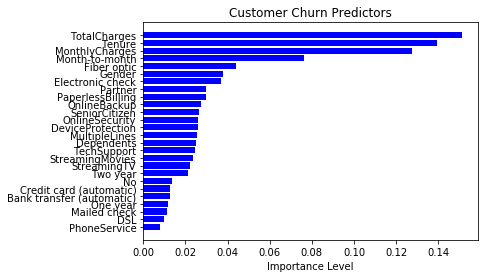

In [ ]:
feature_importance_indicator.fit(x,y)
features = x.columns
importances = feature_importance_indicator.feature_importances_
indices = np.argsort(importances)

plt.title('Customer Churn Predictors')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance Level')
plt.show()

Fantastic. So above we have a clear breakdown of how important each column is] to the final prediction. Put very simply, the higher this coefficient is, the more important it is for making these predictions. In case you want to learn more about what these numbers really mean, you can check out [this useful piece of documentation](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html).

Just like with the correlations, you can use whatever threshold you like, however I'm going to go with the regular **0.05** measure. If the importance of the column is below 0.05, then we can conclude that the **Decision Tree** deems this column completely useless. So we will now check the feature importance of the columns that we had singled out as having no correlation in the previous step. Here they are with their feature importance coefficient:


*  **['Gender']** : 0.038
*   **['PhoneService ']**  : 0.007
*  **['MutipleLines ']**  : 0.024
* **['OnlineBackup  ']**: 0.027
* **['DeviceProtection']** : 0.026
* **['StreamingTV  ']** : 0.022
* **['StreamingMovies   ']**: 0.23

Yep, that's right, none of our columns have survived the second test. We can now safely eliminate them from our data, thus saving us computer memory and avoiding unnecessary confusion for our dear algorithm.

You will have of course noted that there are plenty of other columns that fell below the **0.05** mark, however, because they all had some sort of correlation with the ['Churn'] column, they might be useful for other types of algorithms, so we'll be keeping them for now. Remember, we only eliminate our columns that have failed both tests so that we can be 100% confident that they cannot contribute to the accuracy of our prediction.

So let's get rid of these useless columns.


In [ ]:
# with the ".drop" command, we can delete the columns we have deemed unnecessary.
x.drop(columns=['Gender','PhoneService','MultipleLines','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'],inplace=True)

In [ ]:
#Let's print our final data
x.head(10)

,SeniorCitizen,Partner,Dependents,Tenure,OnlineSecurity,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,Fiber optic,DSL,No,Month-to-month,Two year,One year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
CustomerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,-1.280157,0,0,1,-1.161611,-0.994123,0,1,0,1,0,0,1,0,0,0
5575-GNVDE,0,0,0,0.064298,1,0,0,-0.260859,-0.173727,0,1,0,0,0,1,0,1,0,0
3668-QPYBK,0,0,0,-1.239416,1,0,1,-0.363897,-0.959581,0,1,0,1,0,0,0,1,0,0
7795-CFOCW,0,0,0,0.512450,1,1,0,-0.747797,-0.195234,0,1,0,0,0,1,0,0,1,0
9237-HQITU,0,0,0,-1.239416,0,0,1,0.196164,-0.940391,1,0,0,1,0,0,1,0,0,0
9305-CDSKC,0,0,0,-0.994970,0,0,1,1.158407,-0.645323,1,0,0,1,0,0,1,0,0,0
1452-KIOVK,0,0,1,-0.424595,0,0,1,0.807745,-0.147302,1,0,0,1,0,0,0,0,0,1
6713-OKOMC,0,0,0,-0.913487,1,0,0,-1.164935,-0.874107,0,1,0,1,0,0,0,1,0,0
7892-POOKP,0,1,0,-0.180148,0,1,1,1.329583,0.336492,1,0,0,1,0,0,1,0,0,0


Done! As you can see, our dataset is has been reduced to  19 columns. One final thought:

###**Important Features**

The cool thing about **Feature Selection** is that it also tells us which features seem to be the most important in defining the outcome of what we are seeking to predict. This in itself can be extremely insightful.

For example, in our case, if we go back and look for the highest coefficients in both tests, these columns clearly stand out:


*   **['Tenure']**
*   **['MonthlyCharge']**
*   **['TotalCharge']**

As we see, these columns are related to the cash amount customers have paid. This can be very interesting for two reasons:



1.   If after training our model, we aren´t happy with its accuracy, then we know that we need to collect more new data related to the amount that the customers pay, as this seems to be highly indicative of whether they churn or not.

2.   At a company level, I think it is important to know that these are the deciding factors in a user leaving the company. We could deduce from this that there is a lot of market competition and/or that the users are not perceiving much differentiation in this company's services. Either way, the user is **very price-elastic**. Fortunately, this also means that price incentives such as discounts should be an effective way of preventing users who are about to churn from actually doing so.


##Part 2- Data Learning 

So this is actually the surprising easy part. Now that our data has been formatted and we've dropped the irrelevant columns, we can now feed it into our learning algorithm  that will learn from the data to make predictions.




####Step 1- Splitting the data

First things first, we need to split our data into two sections. The first is called **'training data'** which we'll give to the algorithms to learn from. The second set will be called **'testing data'**, we will use this data to evaluate how good the predicitions from our models are. Think of it as an exam for our learning algorithm.


*We* can break down our new data in the following way:



1.   **x_training** (80% of the data)
2.   **y_training** (80 % of the answers)
3.   **x_testing**  (20 % of the data that the model never sees, used for making new predictions to evaluate the model)
4.   **y_testing**  (20 % of the answers, used to see how they match the predictions made by the model on the 'x_testing' data)





In [ ]:
# We use the "train_test_split" command to seperate our data into "training" and "testing". The "test_size" variable allows to decide how much of the data we will keep for testing, in this case we do a conventional 80-20 split. 
#Random state shuffles the data, which is allows good practice. The number 18 just allows to shuffle the data the same way every time the code is executed, important for reproducability.
x_training, x_testing, y_training, y_testing = train_test_split(x, y, test_size=0.2, random_state=18)




####Step 2 - Choosing The Evaluation Metric

First of all, let's define some useful vocabulary. This will help us to understand how well our model is performing. There are four types of predictions that our model could make: **True Positive, False Positive,   True Negative,  False Negative**. Let's define these terms:

* **True Positive**: This is a good prediction, our model predicted that the customer was going to churn (emitted a **1**) and the customer did in reality churn (churn=**1**).

* **False Positive**: This is an incorrect prediction, our model predicted that our customer churned ( emitted a **1**), however it turns out that customer did not in fact churn (churn=**0**)

* **True Negative** : This is again a correct prediction, our model said that the customer **was not** going to churn ( it emitted a **0**) and this turned out to be correct in the real world ( churn was equal to **0**)

* **False Negative**: Again, this is an incorrect prediction, but of a different kind. Here our model predicted that the customer was not going to churn (emitted a **0**), but lo and behold, in reality our customer did in fact leave the company (churn=**1**)

With this now clearly defined, we need to decide what evaluation metric we will use to evaluate our model.

This actually is a crucial concept, and we have three evaluation options to choose from:

1.   **Precision** - High precision means that the model does not give many **"False Positives"**. 

2. **Recall** High Recall means that model has a very low proportion of **"False Negatives"**. 

3.  **F1 Score** The F1 Score is a balance between Precision and Recall, this a great  measure for overall accuracy. 

Which of these metrics are most important to pay attention to? Well, this wholly depends on your context and what type of error is most costly to your business. Here we need to analyse the consequence of each type of error.

If, for example a **false positive** is very very costly, such as in the case of Face Recognition or Mortgage Approval, then we will want to maximise the **Precision** metric as much as possible.

However, if getting a false negative is even more problematic, as for example in cases such as Fraud Detection or Cancer Diagnosis, then we'll make sure our model has the highest **Recall** measure possible. 

If obtaining a false negative is just as bad as a false positive and there is no difference between them, then we can simply use the **F1 score**. 

Remember there is no right or wrong answer here because it is a judgment call based on your own individual context.

So let's go back to our own specific case and decide which is the most costly. Imagine, we wrongly thought that a customer was about to Churn when in fact he/she had no intention in doing so ( **false positive**), the worst case scenario would be that we gave them an unnecessary discount.

However, if we failed to identify that a customer was about to churn ( **false negative**), then the consequences are a lot bleaker: the customer can move to the competition. It is well known that in telecommunications, the LTV ( Life Time Value) is high ( in the case of Telco, our data informs us that it is around **$2,500** per customer ! )  and so losing that customer will be extremely costly and getting  them back will be very lengthy.

This is indeed a pretty clear case where having a false negative error is a lot more problematic than a false positive, so we'd rather have a model that produces very few **false negatives** (even if that means that it will make more **false positives**). Therefore, we'll use **Recall** as our evaluation metric.



####Step 3- Creating, training and testing our algorithms 

So now that we have our data and we know what evaluative metric we'll be using, we can finally use our learning algorithms. We'll be using  with an extremely common and effective algorithm called **Logistic Regression**.



* **Logistic Regression** Quite possibly the most popular algorithm for binary classification.  We will use this algorithm because it is one of the best for binary classifications and also works well with small datasets ( less than 10,000) like in our case. Most importantly of all, it is very easy to optimize with regards to our evaluation metric.



Here is a visual example of how **Logistic Regression** is able to discriminate between the data:


![alt text](http://api.ning.com/files/BLRhjJ5GSEnu-TjYW2cexTEbLfMnDWRa40PPL0SrRhIgpFmTjY5n9xFH24K1KQqp4U28glRU-UWum3rr50*b8stW2KedAi02/Capture.PNG)




If you are curious about the inner workings of Logistic Regression, you can learn more [here](https://en.wikipedia.org/wiki/Logistic_regression#Logistic_model) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). But as always, there is absolutely no need to understand the algorithm mathematically to use it.

Thanks to the **SKLearn Library**, we simply need one line of code to load the algorithm. That's it.



In [ ]:
# We load the Algorithm from the library and give the name of "logistic_regression"
logistic_regression= LogisticRegression()



Next, we only need another line of code to tell our algorithms to start to learn the mapping between our **"x_training"** data and the **"y_training" ** answers.  For this, we only need to use the ** ".fit"** command. This is the bulk of the work done automatically for us. Running this might take 5 seconds ( and you can ignore all the gobbledygook).




In [ ]:
logistic_regression.fit(x_training,y_training)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Our models are now trained! That wasn't so hard now was it?

Right, now that the algorithm has learned how to make churn predictions from this data, we need to evaluate how good those predictions are. 

Remember we are using the **recall** metric ( high recall= **low false negatives**). Here we use the ". predict" command to get our model to make a prediction for the testing examples. We can then compare the model's predictions to the real-world answers of both the training dataset (**y_training**) and the training dataset (**y_testing**).

Here, using a loop, we can easily calculate the number of True Positives (**TP**), False Positives (**FP**), True Negatives (**TN**) and False Negatives(**FN**) that our model produced.

In simple terms, remember that we are looking for the model's predictions to have as few False Negatives (**FN**) as possible.

In [ ]:
#We initialize the following variables that help us count the number of True Positives, False Positives, etc.
TP=0
FP=0
TN=0
FN=0


#We use a loop to count the number of TN, TP, TN, FN. Each time we detech one, we add a '1' to the corresponding variable
for i in range(len(x_testing)):
  
    if logistic_regression.predict(x_testing.iloc[[i,]])==1 and y_testing.iloc[i]==1:
                                       TP=TP+1
    if logistic_regression.predict(x_testing.iloc[[i,]])==1 and y_testing.iloc[i]==0:
                                       FP=FP+1      
    if logistic_regression.predict(x_testing.iloc[[i,]])==0 and y_testing.iloc[i]==0:
                                      TN=TN+1    
                                      
    if logistic_regression.predict(x_testing.iloc[[i,]])==0 and y_testing.iloc[i]==1:
                                       FN=FN+1   
#Printing our results
print ("Logistic Regression", "True Positives:",TP, "False Positives:",FP,"True Negatives:",TN , "False Negatives:", FN) 


#Calculating the 'Recall' metric with this simple formula
log_recall=TP/(TP+FN)

#Printing our the 'Recall' metric in %
print("Logistic Regression Recall On Training Data:", log_recall *100,'%')



Logistic Regression True Positives: 186 False Positives: 99 True Negatives: 947 False Negatives: 175
Logistic Regression Recall On Training Data: 51.52354570637119 %


####Threshold importance
It is usually a good idea to set an accuracy threshold to aim for. Once the algorithm has hit that objective on the testing data, then we consider the learning part done and dusted  This threshold is usually set by the higher management. 

In our case, we'll imagine that we've been given a **90%** recall threshold as our target. We want our algorithms to detect if a customer is going to churn 90% of the time. 

After running our algorithm for the first time, we see we have a recall rate of **51%**, not good enough, our model is only able to recognize the churned customer 51% of the time. 

####Model Optimization

We will now optimize our model. As discussed earlier, we want to be sure to catch all the churned customers. This means we need to ask our model to be more biased ( at the moment it is treating  the churned class (**1**) and the non-churned (**0**) with the same importance (50-50). We can now ask our model to give more priority to churning customers (those with **1** value). Let's first try a 70-30 approach.


In [ ]:
#we initialize a class weights for our two labels : 1 (churned) and 0 (churned) at 70-30

class_weights ={1: 0.70, 0: 0.30}

#we create a new logistic regression model optimized for a better recall and retrain it on our data
logistic_regression_opt= LogisticRegression(class_weight=class_weights)
logistic_regression_opt.fit(x_training,y_training)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight={0: 0.3, 1: 0.7}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

We then reevaluate the model with the same method as we used earlier.

In [ ]:
TP=0
TN=0
FP=0
FN=0

for i in range(len(x_testing)):
    if logistic_regression_opt.predict(x_testing.iloc[[i,]])==1 and y_testing.iloc[i]==1:
                                       TP=TP+1
    if logistic_regression_opt.predict(x_testing.iloc[[i,]])==1 and y_testing.iloc[i]==0:
                                       FP=FP+1      
    if logistic_regression_opt.predict(x_testing.iloc[[i,]])==0 and y_testing.iloc[i]==0:
                                       TN=TN+1    
                                       
    if logistic_regression_opt.predict(x_testing.iloc[[i,]])==0 and y_testing.iloc[i]==1:
                                       FN=FN+1   

print ("Logistic Regression", "True Positives:",TP, "False Positives:",FP,"True Negatives:",TN , "False Negatives:", FN) 

log_recall=TP/(TP+FN)

print("Logistic Regression Recall On Training Data:", log_recall *100,'%')


Logistic Regression True Positives: 274 False Positives: 254 True Negatives: 792 False Negatives: 87
Logistic Regression Recall On Training Data: 75.90027700831024 %


Great, that seemed to have worked!  Our recall shot  up and is now **75%** ! However we are still short of our 90% target, but we are heading in the right direction. We can see now that our model is starting to get more 'paranoid' about who is going to churn. As a consequence, it identifies more churning customers, but also sometimes over hits the mark and gives us more **False Positives**.

In order to reach our 90% target, let´s try an even more skewed model, with a 85-15% split prioritization for the churned customers (**1 **  value).

In [ ]:
#Update the weights to 85-15%
class_weights ={1: 0.85, 0: 0.15}

#Retrain the algorithm
logistic_regression_opt= LogisticRegression(class_weight=class_weights)
logistic_regression_opt.fit(x_training,y_training)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight={0: 0.15, 1: 0.85}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Re-evaluating the model on the 85-15 split.

TP=0
TN=0
FP=0
FN=0

for i in range(len(y_testing)):
  
    if logistic_regression_opt.predict(x_testing.iloc[[i,]])==1 and y_testing.iloc[i]==1:
                                       TP=TP+1
    if logistic_regression_opt.predict(x_testing.iloc[[i,]])==1 and y_testing.iloc[i]==0:
                                       FP=FP+1      
    if logistic_regression_opt.predict(x_testing.iloc[[i,]])==0 and y_testing.iloc[i]==0:
                                       TN=TN+1    
                                       
    if logistic_regression_opt.predict(x_testing.iloc[[i,]])==0 and y_testing.iloc[i]==1:
                                       FN=FN+1   

print ("Logistic Regression", "True Positives:",TP, "False Positives:",FP,"True Negatives:",TN , "False Negatives:", FN) 

log_recall=TP/(TP+FN)

print("Logistic Regression Recall On Training Data:", log_recall *100,'%')



Logistic Regression True Positives: 331 False Positives: 449 True Negatives: 597 False Negatives: 30
Logistic Regression Recall On Training Data: 91.68975069252078 %


Done. Our recall has now reached **91 %**  ! This means that when given the testing data that our model had not previously seen, the model was able to predict a customer churning 91% of the time.  We have reached our target!

Here, you will note that as expected, our number of **False Negatives** fell sharply ( from 175 to 30) while the number of **True Positives** almost doubled as a consequence ( from 186 to 331). However, as a trade-off, the number of **False Positives** rose significantly ( from 99 to 449). We can live with this because as previously discussed, the consequences of a **False Positive** are vastly smaller in comparison to a **False Negative**.

 
Our model learning is now finished, since we now have a model that is able to catch a customer who is  about to churn **91% ** of the time just as our pre-established threshold instructed. This is when you can crack open the champagne . The most critical part is done and dusted. We now need to  put our new super predictive model to good use.

# Part 3- Data Predicting

*Disclaimer: This section is optional and perhaps the least interesting of the three. We will now set up a small program that can alert employees if a customer is about to churn based on new data. This part can also be readily executed with traditional web development tools by a programmer and it is not as relevant for non-technical staff to know how this works. However, if you are curious, please feel free to keep reading.*

#### Step 1- Inputting New Data

In this first section, we will prompt a user, in this case, let's imagine this to be a customer representative, to input the data concerning a new customer. Later on, we will take this new data and ask our previously trained model to tell us whether this particular customer is likely to churn or not.

We create the input prompts:



In [ ]:

#These prompts will ask the customer representative to type in the answers so that we can collect the data we need to know so that we can predict their churn
sen_citizen = input ("Is this customer Over 65 Years Old? (Yes/No)")
partner = input ("Is this customer Maried? (Yes/No)")
depend=input("Does this customer have childreen? (Yes/No)")
tenure= int(input("How many months has the customer been with the company "))# We use the 'int' command to turn the input into a whole number (integer)
online_security=input("Does the customer use the ""Online Security"" Service? ")
tech_support=input("Does the customer use the ""Tech Support "" Service? (Yes/No)")
pplerless_billing=input("Does the customer pay their bills online (Yes/No)" )
month_charges=float(input('How Much Does the Customer Pay Every Month? '))#We use the 'float' command to turn the input into a decimal number.
total_charges= float(input('How much has the customer spent in their entire history with the company?'))
internet_type=input("What type of Internet Service does the customer have ?(Fiber optic/DSL/ No internet)")
contract_type=input("How often does the customer pay?(Month-to-month/ Every year/ Every two years)")
payment_type=input('How does the customer pay? (E-check/Mailed check/Bank transfer/Credit card)')




*Feel free to enter above some made up variables just to test out the code*

Once we've received these inputs, we need to format them into numbers (just like we did in our **Data Cleaning** section) so that our algorithm that read them:

In [ ]:
#Mean Normalization. First we need to reload our original data to get our original means and standard deviations.

original_data=pd.read_excel(data_url)

tenure_formatted= (tenure-original_data['Tenure'].mean())/original_data['Tenure'].std()
month_charges_formatted= (month_charges-original_data['MonthlyCharges'].mean())/original_data['MonthlyCharges'].std()
total_charges_formatted= (total_charges-original_data['TotalCharges'].mean())/original_data['TotalCharges'].std()


#Next, following the same process, we carry out Label Encoding ( turning 'Yes' into 1s and 'No' into 0s)
if sen_citizen=='Yes':
  sen_citizen_formatted=1
else:
  sen_citizen_formatted=0

if partner=='Yes':
  partner_formatted=1
else:
  partner_formatted=0
  
if depend=='Yes':
  depend_formatted=1
else:
  depend_formatted=0

if online_security=='Yes':
  online_security_formatted=1
else:
  online_security_formatted=0
  
if tech_support=='Yes':
  tech_support_formatted=1
else:
  tech_support_formatted=0
  
if pplerless_billing=='Yes':
  pplerless_billing_formatted=1
else:
  pplerless_billing_formatted=0

#finally, we will do one hot encoding for the input with mutliple options. 

#create three columns, all at zero to begin with.
fiber_optic_formatted=0
dsl_formatted=0
no_internet_formatted=0

#According to the input received, one of the three variable will have to change to '1' correspondingly, while the other stay at zero.

if internet_type=='Fiber optic':
  fiber_optic_formatted=1
  
if internet_type=='DSL':
  dsl_formatted=1
  
if internet_type=='No internet':
  no_internet_formatted=1


#We repeat with the other two multiple option inputs


month_to_month_contract=0
one_year_contract=0
two_year_contract=0

if contract_type=='Month-to-month':
  month_to_month_contract=1
  
if contract_type=='Every year':
  one_year_contract=1
  
  
if contract_type=='Every two years':
  two_year_contract=1
  
e_check_formatted=0
mail_check_formatted=0
bank_transfer_formatted=0
credit_card_formatted=0

if payment_type=='E-check':
  e_check_formatted=1
  
if payment_type=='Mailed check':
  mail_check_formatted=1

if payment_type=='Bank transfer':
  bank_transfer_formatted=1
  
if payment_type=='Credit card':
  credit_card_formatted=1

  





Now that we have formatted our new inputs into the same format as our training data, we need to list these variables in the same order as in the training data.

Essentially, it is as if we are creating a new row to our dataset and then carrying out a prediction on it.

To make sure we are respecting the order of the columns of our original data, we can print out the order here below so that we are sure to follow it when creating our new row.

In [ ]:
x.columns



In [ ]:
#Creating a row containing all the new inputted data that follows the same order as in our training and testing datasets

formatted_inputs_for_prediction= [[sen_citizen_formatted,partner_formatted,depend_formatted,tenure_formatted, online_security_formatted,tech_support_formatted,
                                  pplerless_billing_formatted, month_charges_formatted, total_charges_formatted, fiber_optic_formatted,dsl_formatted,
                                  no_internet_formatted,month_to_month_contract,one_year_contract,two_year_contract,e_check_formatted,mail_check_formatted,
                                  bank_transfer_formatted, credit_card_formatted]]

#Printing these formatted inputs to make sure they look good
print(formatted_inputs_for_prediction)

And now, with a simple line of code, we can output a prediction to inform our customer rep how to proceed:

In [ ]:
prediction = logistic_regression_opt.predict(formatted_inputs_for_prediction)

print(prediction)

if prediction == 1:
  print('This customer is likely to churn! Offer them a %15 discount on their next payment!')
else:
  print('It is unlikely that this customer will churn.')



[link text](https://)It's important to update our model on a frequent basis, every quarter or even every month, to incorperate  changing consumer trends.

---





##Conclusion

And that's the final part. Of course, once you have the model trained, there are lots of different contexts where you could apply it, the inputs for example could be taken automatically from the customer's profile from an SQL database (rather than entered by an employee)  or when given churn prediction, we could  allocated the customer to a corresponding CRM pipeline.

But for now, this concludes our tutorial. The aim for me here was to demystify Machine Learning and to demonstrate to non-technical folk how it is possible to obtain very concrete results with a straightforward methodology and an easy to use algorithm so that you can apply it within your company as of today. 

I really believe that these sort of statistical predictions can give you a great advantage with almost no effort,  no matter what your industry might be, and most of all it is accessible to everyone who possesses a keyboard and some information on their customers. Feel free to use all the code in this tutorial on your own data and I hope you will find find it easy and convenient to carry out your own "Churn Predictor" for your own customer and clients.

If you have any comments or queries, please get back to me at [conrad.w.s@gmail.com](mailto:conrad.w.s@gmail.com) and I'll try to get back at you as fast as I can.

And let´s call it a day !
 